In [50]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler



In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx


In [51]:
df=pd.read_csv('merged.csv')

In [52]:
print(df.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue     CustomerName         Region  SignupDate  \
0      300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36  Travis Campbell  South America  2024-04-11   
4      902.04    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category   Price PriceRange  
0  ComfortLiving Bluetooth Speaker  Electronics  300.68    300–400  
1  ComfortLiving Bluetooth Speaker  Electronics  300.68    300–400  

In [53]:
pivot_data = df.pivot_table(index='CustomerID', columns='ProductID', values='TotalValue', fill_value=0)



In [54]:
# Scale Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pivot_data)

In [55]:
# Compute Similarity
similarity_matrix = cosine_similarity(scaled_data)



In [56]:
# Recommend Top 3 Lookalikes
def recommend_lookalikes(customer_index, n=3):
    scores = similarity_matrix[customer_index]
    top_indices = scores.argsort()[-(n+1):-1][::-1]
    return [(pivot_data.index[i], scores[i]) for i in top_indices]



In [57]:
# Generate Recommendations
lookalike_dict = {}
for i, customer_id in enumerate(pivot_data.index[:20]):
    lookalike_dict[customer_id] = recommend_lookalikes(i)



In [58]:
# Save Recommendations
import csv
with open("Lookalike.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["CustomerID", "Lookalikes"])
    for cust_id, lookalikes in lookalike_dict.items():
        writer.writerow([cust_id, lookalikes])


In [49]:
def visualize_lookalikes(customer_ids):
    # Create a graph
    G = nx.Graph()

    # Add nodes and edges for the specified customers
    for customer_id in customer_ids:
        if customer_id not in lookalike_dict:
            print(f"Customer ID {customer_id} not found in the lookalike dictionary.")
            continue
        
        # Add the customer node
        G.add_node(customer_id)

        # Add lookalike nodes and edges
        for lookalike_id, score in lookalike_dict[customer_id]:
            G.add_node(lookalike_id)
            G.add_edge(customer_id, lookalike_id, weight=score)

    # Draw the graph
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G, k=0.5)
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold')
    plt.title('Lookalike Network for Specified Customers')
    plt.show()



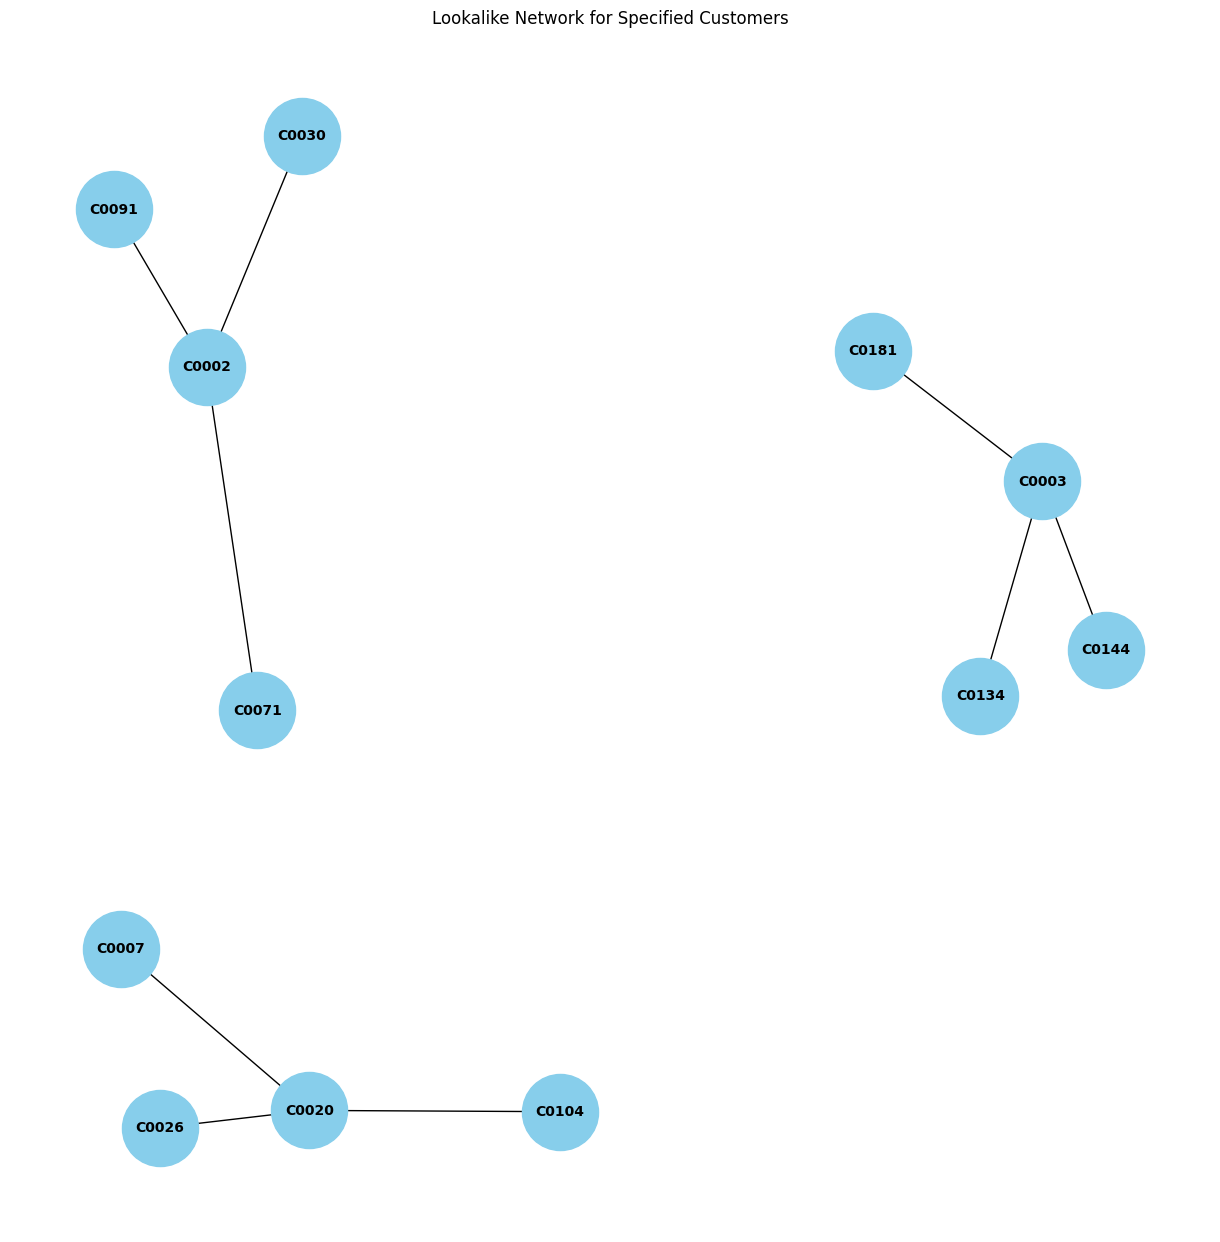

In [48]:
# Example usage: Visualize lookalikes
visualize_lookalikes(["C0002", "C0003", "C0020"])  # Replace with the specific customer IDs you want to visualize